# Завдання
Протягом 50 років вимірювався рівень води навесні під час повені відносно умовного нуля. Результати вимірювання наведено у вигляді інтервального статистичного розподілу:

$x_i$|0-24|24-48|48-72|72-96|96-120|120-144|144-168|168-192|192-216
-----|-|-|-|-|--|-|-|-|--
$n_i$|1|2|4|6|12|16|6|2|1

За даними статистичними розподілами вибірки висунути $H_0$ про закон розподілу ознаки генеральної сукупності і при рівні значущості $\alpha=0,01$ перевірити її правильність


# Розв'язок

$x_i$|12|36|60|84|108|132|156|180|204
-----|-|-|-|-|--|-|-|-|--
$n_i$|1|2|4|6|12|16|6|2|1

In [2]:
x_i = [12,36,60,84,108,132,156,180,204]
n_i = [1,2,4,6,12,16,6,2,1]

def function(x, n):
    l = len(x)
    list_for_diagram = []
    for i in range(l):
        for j in range(n[i]):
            list_for_diagram.append(x[i])
    return list_for_diagram

list_for_diagram = function(x_i,n_i)
print(list_for_diagram)

[12, 36, 36, 60, 60, 60, 60, 84, 84, 84, 84, 84, 84, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 156, 156, 156, 156, 156, 156, 180, 180, 204]


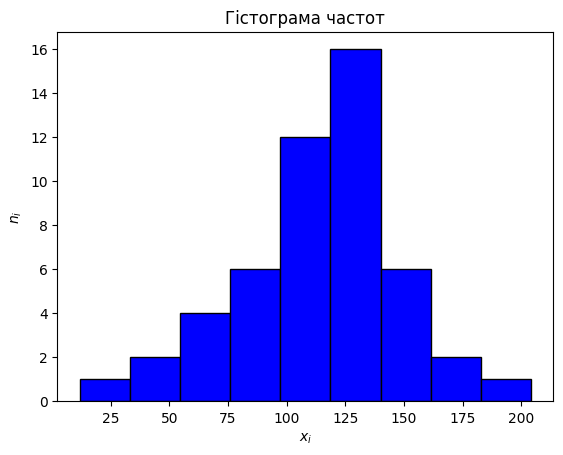

In [3]:
import matplotlib.pyplot as plt

plt.hist(list_for_diagram, color = 'blue', edgecolor = 'black',
         bins = int(180/19))

plt.title('Гістограма частот')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$n_i$')
plt.show()

Об’єм вибірки $n=50$.
Знайдемо $\overline{x}$

In [36]:
x_average = sum(list_for_diagram)/50
print(f'Вибіркове середнє дорівнює x={x_average}')

Вибіркове середнє дорівнює x=114.72


Знайдемо $\sigma$

In [45]:
dispersion = ((sum(i**2 for i in list_for_diagram))/50 - x_average**2)**0.5
print(round(dispersion, 3))

38.111


Перейдемо від інтервалів $(\alpha_{𝑖−1}, \alpha_{i})$ до інтервалів $(z_{𝑖−1}, z_{i})$ за формулами: 
$z_{𝑖−1} =\frac{\alpha_{𝑖−1}−\overline{x}}{\sigma}$, $z_{𝑖} =\frac{\alpha_{𝑖}−\overline{x}}{\sigma}$, причому найменше значення $z_0=−∞$, а найбільше значення $z_m=+∞$.


Тоді $z_0=−∞$, $z_9=+∞$.

In [59]:
l = [24,48,72,96,120,144,168,192]
list_of_z = []
for i in range(len(l)):
    z_i = round((l[i]-x_average)/dispersion,2)
    print(f'z_{i+1}={z_i}')
    list_of_z.append(z_i)
print(list_of_z)


z_1=-2.38
z_2=-1.75
z_3=-1.12
z_4=-0.49
z_5=0.14
z_6=0.77
z_7=1.4
z_8=2.03
[-2.38, -1.75, -1.12, -0.49, 0.14, 0.77, 1.4, 2.03]


𝑖|(𝑧𝑖−1; 𝑧𝑖)|Ф(𝑧𝑖−1)|Ф(𝑧𝑖)|
-----|-|-|-|
1|(−∞;-2,38)      |-0,5|-0,4913|
2|(-2,38;-1,75)  |-0,4913|-0,4599|
3|(-1,75; -1,12)|-0,4599|-0,3686|
4|(-1,12; -0,49)|-0,3686|-0,1879|
5|(-0,49; 0,14) |-0,1879|0,0557|
6|(0,14; 0,77)  |0,0557|0,2794|
7|(0,77; 1,4)  |0,2794|0,4192|
8|(1,4; 2,03)  |0,4192|0,4783|
9|(2,03; +∞)   |0,4783|0,5|


In [90]:
a_1, b_1 = -0.5, -0.4913
a_2, b_2 =-0.4913, -0.4599
a_3, b_3 =-0.4599, -0.3686
a_4, b_4 =-0.3686, -0.1879
a_5, b_5 =-0.1879, 0.0557
a_6, b_6 =0.0557, 0.2794
a_7, b_7 =0.2794, 0.4192
a_8, b_8 =0.4192, 0.4783
a_9, b_9 =0.4783, 0.5

p=[]
p.append(round(b_1-a_1,4))
p.append(round(b_2-a_2,4))
p.append(round(b_3-a_3,4))
p.append(round(b_4-a_4,4))
p.append(round(b_5-a_5,4))
p.append(round(b_6-a_6,4))
p.append(round(b_7-a_7,4))
p.append(round(b_8-a_8,4))
p.append(round(b_9-a_9,4))
print(p)

[0.0087, 0.0314, 0.0913, 0.1807, 0.2436, 0.2237, 0.1398, 0.0591, 0.0217]


In [91]:
print(round(sum(p), 3))

1.0


In [92]:
np = []
for i in p:
    np.append(round(i*50,3))
print(np)
print(sum(np))

[0.435, 1.57, 4.565, 9.035, 12.18, 11.185, 6.99, 2.955, 1.085]
50.0


i|(z{i−1};z{i}] |Ф(z{i−1})|Ф(z{i})|p{i}  |n{i}=np{i}|n{i}округлене|
-|:------------:|:------:|:-----:|:----:|:---------:|:---:|
1|(−∞;-2,38]    |-0,5     |-0,4913|0,087 |0.435|1|
2|(-2,38;-1,75] |-0,4913  |-0,4599|0,314 |1.57|2|
3|(-1,75; -1,12]|-0,4599  |-0,3686|0,0913|4.565|4|
4|(-1,12; -0,49]|-0,3686  |-0,1879|0,1807|9.035|9|
5|(-0,49; 0,14] |-0,1879  |0,0557 |0,2436|12.18|12|
6|(0,14; 0,77]  |0,0557   |0,2794 |0,2237|11.185|11|
7|(0,77; 1,4]   |0,2794   |0,4192 |0,1398|6.99|7|
8|(1,4; 2,03]   |0,4192   |0,4783 |0,0591|2.955|3|
9|(2,03; +∞)    |0,4783   |0,5    |0,217 |1.085|1|


Примітка: в першому рядку округлюємо до одиниці щоб в подільшому уникнути ділення на нуль.

i|n{i}експ|n{i}теор|n{i}експ-n{i}теор|(n{i}експ-n{i}теор)^2|(n{i}експ-n{i}теор)^2/n{i}теор
-|:------:|:------:|:---------------:|:-------------------:|:----:|
1|1       |1       |       0         |1                    |0|
2|2       |2       |       0         |0                    |0|
3|4       |4       |       0         |1                    |0|
4|6       |9       |      -3         |9                    |1|
5|12      |12      |       0         |0                    |0|
6|16      |11      |       5         |25                   |2,2727|
7|6       |7       |      -1         |1                    |0,1429|
8|2       |3       |      -1         |1                    |0,3333|
9|1       |1       |       0         |0                    |0|

In [4]:
a_1, b_1 =1,0  
a_2, b_2 =2,0  
a_3, b_3 =5,0  
a_4, b_4 =9,9 
a_5, b_5 =12,0 
a_6, b_6 =11,25
a_7, b_7 =7,1 
a_8, b_8 =3,1 
a_9, b_9 =1,0

g=[]
g.append(round(b_1/a_1,4))
g.append(round(b_2/a_2,4))
g.append(round(b_3/a_3,4))
g.append(round(b_4/a_4,4))
g.append(round(b_5/a_5,4))
g.append(round(b_6/a_6,4))
g.append(round(b_7/a_7,4))
g.append(round(b_8/a_8,4))
g.append(round(b_9/a_9,4))
print(g)
print(f'К_емп={sum(g)}')

[0.0, 0.0, 0.0, 1.0, 0.0, 2.2727, 0.1429, 0.3333, 0.0]
К_емп=3.7489


За таблицею критичних точок розподілу при рівні значущості α = 0,01 та числі ступенів свободи 𝑟 = 𝑚 − 𝑠 − 1 = 9 − 2 − 1 = 6 знаходимо критичну точку з таблиці $k_{кр} = 16,8$. Оскільки $K_{емп}<K_{кр}$ $(3,7489<16,8)$, то немає підстав відхилити нульову гіпотезу.